# Homework 1 - COMPSCIX433 - Eugene Mesgar - 7/3/2023

Instructions: Have all the code for all the questions in one Jupyter notebook and upload the file at the time of submission. I will only consider this file format for grading. Run all the cells before uploading the file. So, after you uploaded the file, check the file extension and if it is not an ipynb, then upload the right file.

Question 1: (5 points) Read dictionary.csv file (this file is in the Files section of your class portal) as a Pandas DataFrame and perform the following:

a) Print the column names.

b) Print the shape.

c) Check if there any missing values or not a number in the columns. Print the missing or not a number count for each column.

d) Find mean of Population and mean of GDP per Capita and print the values.

e) Propose a method to fill the missing values or not a number for each. Explain why you choose this method.




In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv("dictionary.csv")

print( f"Column names: {', '.join( df.columns.to_list())}")
print (f"Dataframe Shape:  {df.shape}")

df = df.rename( columns= { "GDP per Capita" : "GDP_per_Capita" })
    


Column names: Country, Code, Population, GDP per Capita
Dataframe Shape:  (201, 4)


In [3]:
print("Missing values/nan by columm:")
print(df.isna().sum())


Missing values/nan by columm:
Country            0
Code               0
Population         5
GDP_per_Capita    25
dtype: int64


In [4]:
print("Population and GDP per Capita Mean")
print(df.describe().transpose()["mean"].astype(int))

Population and GDP per Capita Mean
Population        37228250
GDP_per_Capita       12882
Name: mean, dtype: int64


,Population,GDP_per_Capita
Population,1.000000,-0.042539
GDP_per_Capita,-0.042539,1.000000


 There is no correlation -- useless to infer A->B, B->A


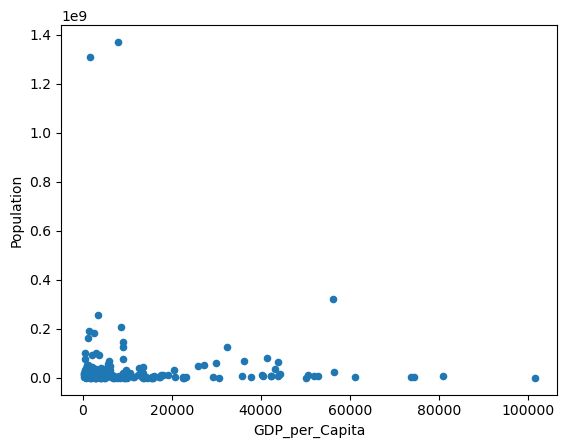

In [5]:
display ( df.corr() ) 
df.plot.scatter(y="Population",x="GDP_per_Capita")
print(" There is no correlation -- useless to infer A->B, B->A")

### There is no correlation between Population and GDP Per Capita.  Left to my own devices, I would drop the NA fieldssince there is no signal.   If forced to fill for some reason, I would choose the median value of each.



In [6]:

print("Filling columns with media value for each column\n")
df_fill = df.fillna( df.median() )

print("Checking to see NA filled")

df_fill.isna().sum()


Filling columns with media value for each column

Checking to see NA filled


Country           0
Code              0
Population        0
GDP_per_Capita    0
dtype: int64

# Part two: Linear regression


Question 2 (5 points): Use Car_Purchasing_Data.csv file, this file is in the Linear Regression folder. In the auto example, find the multi-linear relationship 
between 'Age','Annual Salary', 'Net Worth' with 'Car Purchase Amount'. 
Find the mean squared error and r-squared for test set 
and train set and make a conclusion. 

In [7]:
auto = pd.read_csv('Car_Purchasing_Data.csv')
auto.drop(["Customer Name", "Gender", "Credit Card Debt", "Customer e-mail", "Country"], axis=1, inplace=True)


print(auto.head())

   Age  Annual Salary    Net Worth  Car Purchase Amount
0   42    62812.09301  238961.2505          35321.45877
1   41    66646.89292  530973.9078          45115.52566
2   43    53798.55112  638467.1773          42925.70921
3   58    79370.03798  548599.0524          67422.36313
4   57    59729.15130  560304.0671          55915.46248


In [8]:
# Peek at the data
print(auto.isna().sum())
print( auto.describe()) 

Age                    0
Annual Salary          0
Net Worth              0
Car Purchase Amount    0
dtype: int64
              Age  Annual Salary       Net Worth  Car Purchase Amount
count  500.000000     500.000000      500.000000           500.000000
mean    46.224000   62127.239608   431475.713625         44209.799218
std      7.990339   11703.378228   173536.756340         10773.178744
min     20.000000   20000.000000    20000.000000          9000.000000
25%     41.000000   54391.977195   299824.195900         37629.896040
50%     46.000000   62915.497035   426750.120650         43997.783390
75%     52.000000   70117.862005   557324.478725         51254.709517
max     70.000000  100000.000000  1000000.000000         80000.000000


In [9]:
#Load linear training model
reg = linear_model.LinearRegression()

# Create a StandardScalar and Scale the input variables (not Y)
a_scaler = StandardScaler() # creating an instance of Standard Scaler
auto_independent = a_scaler.fit_transform(auto[['Age','Annual Salary', 'Net Worth']])

#Split data into train and test sit
x_train, x_test, y_train, y_test = train_test_split(auto_independent, auto["Car Purchase Amount"], test_size=0.2, random_state=4)

In [10]:
#Fit model based on training data and create a prediction for our test .. also create predition for train set
reg.fit(x_train, y_train)
yhat_test = reg.predict(x_test)
yhat_train = reg.predict(x_train)

In [11]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, yhat_test)
mse_train = mean_squared_error(y_train, yhat_train)

percent_error = np.abs(mse_train - mse_test)/mse_train

print(f"The delta between the two MSE is: {percent_error:.2%} ")


The delta between the two MSE is: 5.70% 


In [12]:
from sklearn.metrics import r2_score

print(f"r-squared for the test data: {r2_score(y_test, yhat_test):.3f}")
    
print(f"r-squared for the train data: {r2_score(y_train, yhat_train):.3f}")



r-squared for the test data: 0.999
r-squared for the train data: 1.000


### There is a stong relationship between [Age, Annual Salary, Net worth] AND [Car purchase amount].   Using these inputs, we can predict reasonable with confidence the amount a customer will spend on a car.  With a R2 on the test set of .999% and not meaningful drift between MSE Test and MSE Train, we can be confident our model has reasonable predictive power.
